Go to https://data.open-power-system-data.org/household_data/ and filter household_data_60min_singleindex to the three industrial buildings. Then download the dataset and put it in the data folder. Set the path to the folder below.

In [1]:
import pandas as pd
import os
import yaml

In [2]:
path_to_project = "/home/dev/projects/paper/"
path_to_cosmic_data = path_to_project + "data/raw/Cosmic/"
path_to_raw_data = path_to_project + "data/raw/"

In [3]:
df = pd.read_csv(path_to_cosmic_data + "household_data_60min_singleindex_filtered.csv")
df

,utc_timestamp,cet_cest_timestamp,interpolated,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
0,2014-12-11T17:00:00Z,2014-12-11T18:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-12-11T18:00:00Z,2014-12-11T19:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-12-11T19:00:00Z,2014-12-11T20:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-12-11T20:00:00Z,2014-12-11T21:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-12-11T21:00:00Z,2014-12-11T22:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38449,2019-05-01T18:00:00Z,2019-05-01T20:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38450,2019-05-01T19:00:00Z,2019-05-01T21:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38451,2019-05-01T20:00:00Z,2019-05-01T22:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38452,2019-05-01T21:00:00Z,2019-05-01T23:00:00+0200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Delete all rows where none of the datasets has data

In [4]:
df.drop(columns=["cet_cest_timestamp", "interpolated"], inplace=True)
df.rename(columns={"utc_timestamp":"date"}, inplace=True)
data_cols = df.columns[1:]
df.dropna(axis=0, subset=data_cols, inplace=True, how='all')
df

,date,DE_KN_industrial1_grid_import,DE_KN_industrial1_pv_1,DE_KN_industrial1_pv_2,DE_KN_industrial2_grid_import,DE_KN_industrial2_pv,DE_KN_industrial2_storage_charge,DE_KN_industrial2_storage_decharge,DE_KN_industrial3_area_offices,DE_KN_industrial3_area_room_1,...,DE_KN_industrial3_grid_import,DE_KN_industrial3_machine_1,DE_KN_industrial3_machine_2,DE_KN_industrial3_machine_3,DE_KN_industrial3_machine_4,DE_KN_industrial3_machine_5,DE_KN_industrial3_pv_facade,DE_KN_industrial3_pv_roof,DE_KN_industrial3_refrigerator,DE_KN_industrial3_ventilation
7389,2015-10-15T14:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.207835,NaN,NaN,NaN,NaN
7390,2015-10-15T15:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.913124,0.750161,...,NaN,42.782072,18.614309,23.501645,0.0,0.552066,0.050781,0.367290,NaN,29.100329
7391,2015-10-15T16:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.845215,0.915039,...,NaN,64.656250,28.875000,39.812500,0.0,0.900391,0.050781,0.386719,NaN,43.968750
7392,2015-10-15T17:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.765137,1.084961,...,NaN,66.312500,39.031250,56.125000,0.0,1.251953,0.050781,0.386719,NaN,58.281250
7393,2015-10-15T18:00:00Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.470215,1.255127,...,NaN,67.640625,49.312500,72.500000,0.0,1.603516,0.050781,0.386719,NaN,72.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24865,2017-10-12T18:00:00Z,511009.554687,11001.342468,8377.523112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24866,2017-10-12T19:00:00Z,511047.773437,11001.342468,8377.523112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24867,2017-10-12T20:00:00Z,511082.242187,11001.342468,8377.523112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24868,2017-10-12T21:00:00Z,511112.023437,11001.342468,8377.523112,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filter for relevant columns: date, import and pv

In [5]:
date_col = df.filter(like='date')
date_col["date"] = pd.to_datetime(date_col["date"], format='%Y-%m-%dT%H:%M:%SZ')
date_col["date"] = date_col["date"].dt.tz_localize('UTC')
import_cols = df.filter(like='import')
df = pd.concat([date_col, import_cols], axis=1)

/tmp/ipykernel_2424609/3826536581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_col["date"] = pd.to_datetime(date_col["date"], format='%Y-%m-%dT%H:%M:%SZ')
/tmp/ipykernel_2424609/3826536581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_col["date"] = date_col["date"].dt.tz_localize('UTC')


Cut into single data sets

In [6]:
df1_cols = df.filter(like='DE_KN_industrial1')
df2_cols = df.filter(like='DE_KN_industrial2')
df3_cols = df.filter(like='DE_KN_industrial3')

df1 = pd.concat([df1_cols, date_col], axis=1)
df1.dropna(axis=0, subset=df1_cols.columns, inplace=True, how='all')
df2 = pd.concat([df2_cols, date_col], axis=1)
df2.dropna(axis=0, subset=df2_cols.columns, inplace=True, how='all')
df3 = pd.concat([df3_cols, date_col], axis=1)
df3.dropna(axis=0, subset=df3_cols.columns, inplace=True, how='all')

Build differences of imports and pv as they increase monotonically and are therefore electrical work, but we want electrical power. 

In [7]:
df1[df1_cols.columns] = df1[df1_cols.columns].diff()
df2[df2_cols.columns] = df2[df2_cols.columns].diff()
df3[df3_cols.columns] = df3[df3_cols.columns].diff()
df1.dropna(inplace=True)
df2.dropna(inplace=True)
df3.dropna(inplace=True)


Rename import to load.

In [8]:
def rename_import(df):
    df_import_col = df.filter(like="import")
    df.rename(columns={df_import_col.columns[0]:"load"}, inplace=True)
    return df

In [9]:
df1 = rename_import(df1)
df2 = rename_import(df2)
df3 = rename_import(df3)

In [10]:
def tell_availability(df):
    imports = df.dropna(subset="load")
    min_imports = imports.date.min()
    max_imports = imports.date.max()
    weeks = round((max_imports - min_imports).days/7)
    print("Demand available from {} to {}, which is {} weeks".format(min_imports, max_imports, weeks))


In [11]:
for df in [df1, df2, df3]:
    tell_availability(df)

Demand available from 2015-11-28 06:00:00+00:00 to 2017-10-12 22:00:00+00:00, which is 98 weeks
Demand available from 2016-02-22 03:00:00+00:00 to 2017-06-06 00:00:00+00:00, which is 67 weeks
Demand available from 2016-02-11 10:00:00+00:00 to 2017-06-04 22:00:00+00:00, which is 68 weeks


Plot each dataset

<Axes: xlabel='date'>

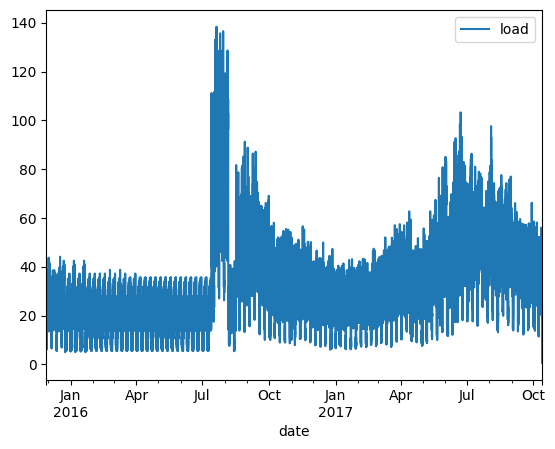

In [12]:
df1.plot(x="date")

<Axes: xlabel='date'>

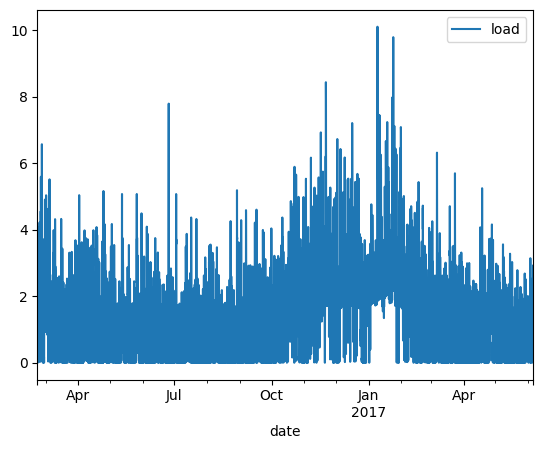

In [13]:
df2.plot(x="date")

<Axes: xlabel='date'>

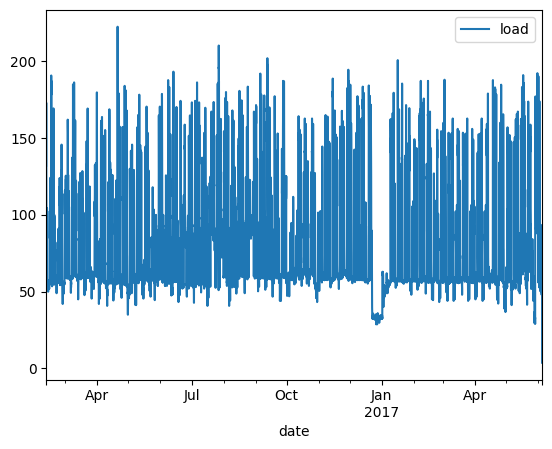

In [14]:
df3.plot(x="date")

Transform to long format

In [15]:
def transform_to_long(df):
    df_long = pd.melt(df, id_vars=['date'], var_name='signal_id', value_name='power')
    return df_long

In [16]:
df1 = transform_to_long(df1)
df2 = transform_to_long(df2)
df3 = transform_to_long(df3)

Save the data as parquet

In [17]:
folders = ["Cosmic1", "Cosmic2", "Cosmic3"]

for folder in folders:
    folder_path = os.path.join(path_to_raw_data, folder)
    os.makedirs(folder_path, exist_ok=True)

In [18]:
df1.to_parquet(path_to_raw_data + "Cosmic1/electricity_demand.parquet")
df2.to_parquet(path_to_raw_data + "Cosmic2/electricity_demand.parquet")
df3.to_parquet(path_to_raw_data + "Cosmic3/electricity_demand.parquet")

In [19]:
# create config files  
datasets = ["Cosmic1", "Cosmic2", "Cosmic3"]
for ds,df  in zip(datasets, [df1,df2,df3]):
    config_content = {
        '_target_': 'eile_forecast.forecast.split_data.GluontsDatasetEile',
        'name': ds,
        'add_seasonalities': True,
        'add_holidays_and_weekends': True,
        'add_weather': False,
        'benchmark_end_date': str(df.date.max().strftime('%Y-%m-%d %H:%M')),
        'main_signal_name': 'load',
        'forecast_signal': 'load',
        'benchmark_start_date': str(df.date.min().strftime('%Y-%m-%d %H:%M')),
        'country': 'Germany',
    }
    
    # Write to YAML file
    yaml_file_path = f'{path_to_project}conf/datasets/{ds}.yaml'
    with open(yaml_file_path, 'w') as yaml_file:
        yaml.dump(config_content, yaml_file, default_flow_style=False)